In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()
print(type(data))

df = pd.DataFrame(data['data'], columns= data['feature_names'])
print("Shape of the dataframe: ", df.shape)
print(df.head())

<class 'sklearn.utils._bunch.Bunch'>
Shape of the dataframe:  (569, 30)
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dime

In [ ]:
scaling = StandardScaler()
scaling.fit(df)
scaled_data = scaling.transform(df)
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [ ]:
principal = PCA(n_components=3)
principal.fit(scaled_data)
x = principal.transform(scaled_data)
x.shape

(569, 3)

1. Scaling data
2. Covariance matrix get computed
3. Eigen vectors (directions/ PC) and eigen values are formed from covariance matrix
4. The ones which have most variance those values will be picked up

In [ ]:
print("Components: ")
print(principal.components_)

print("Explained variance ratio: ")
print(principal.explained_variance_ratio_)

Components: 
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]
 [-0.00853124  0.0645499  -0.00931422  0.02869953 -0.1042919  -0.07409157
   0.00273384 -0.02556354 -0.04023994 -0.02257409  0.26848139  0.37463367
   0.26664537  0.21600653  0.30883898  0.15477972  0.17646374  0.22465757
   0.28858429  0.2115037

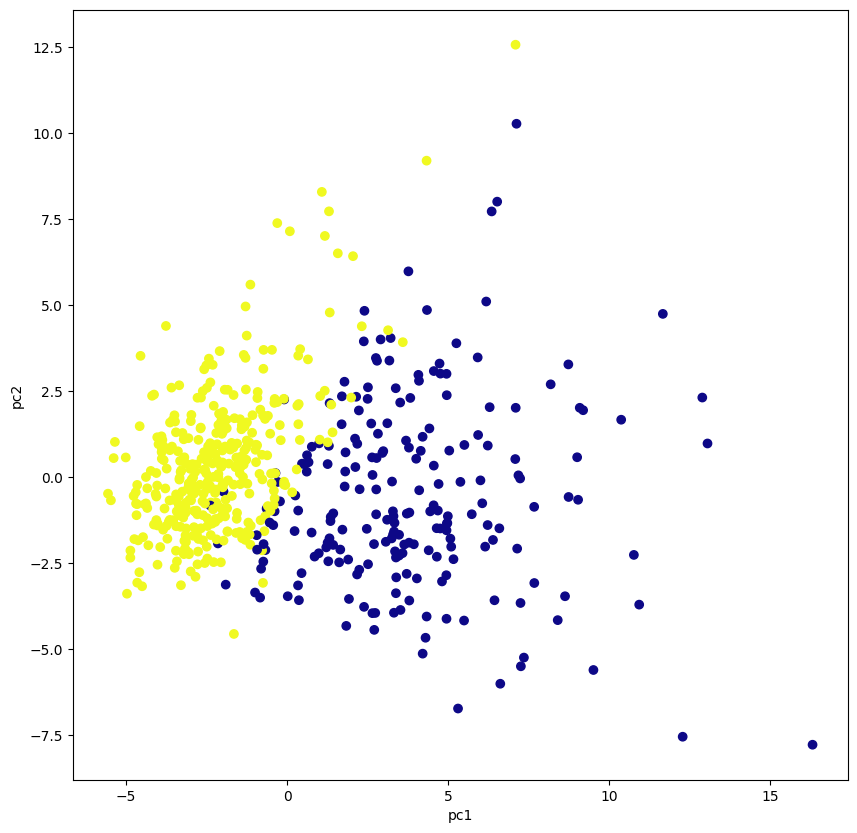

In [17]:
plt.figure(figsize=(10, 10))
plt.scatter(x[:, 0], x[:, 1], c = data['target'], cmap = 'plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()

Text(0.5, 0, 'PC3')

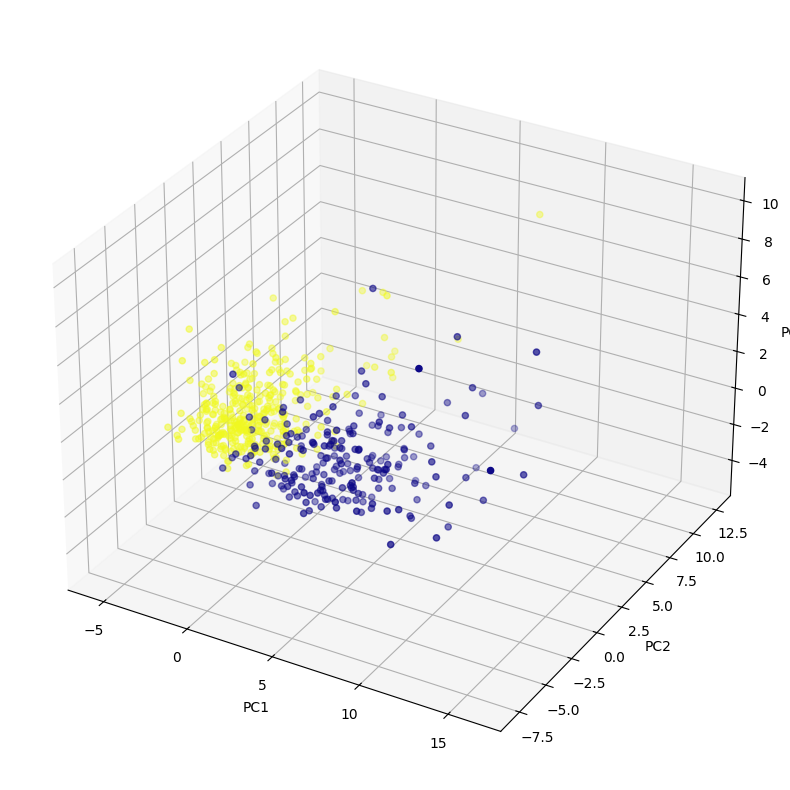

In [19]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10, 10))
axis = fig.add_subplot(projection = '3d')
axis.scatter(x[:, 0], x[:, 1], x[:, 2], c = data['target'], cmap = 'plasma')
axis.set_xlabel('PC1')
axis.set_ylabel('PC2')
axis.set_zlabel('PC3')

In [24]:
# regression model summary
# scikit learn package

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

dataset = load_iris()
x = dataset.data
y = dataset.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
print(model.predict(x_test))
print("Model intercept: ", model.intercept_)

[ 1.23871249 -0.04013211  2.22838234  1.34928356  1.28957782  0.01509759
  1.05072392  1.81477615  1.36347665  1.06563701  1.69803163 -0.07854485
 -0.16011484 -0.06878958 -0.02410259  1.39912838  2.00017795  1.04685134
  1.28418206  1.9691188   0.02814876  1.59654379  0.08792308  1.91658154
  1.85059181  1.86983162  1.79356763  2.03404607  0.02652966  0.02192734
 -0.14139774 -0.07282009  1.17862062  0.00594578 -0.0170986   1.67925082
  1.28710758 -0.07220689]
Model intercept:  0.21023176385323394


In [28]:
from ast import mod
model = LogisticRegression()
model.fit(x_train, y_train)
print(model.predict(x_test))
print("Model intercept: ", model.intercept_)
print("Model coefficients: ", model.coef_)
print("Model score: ", model.score(x, y)) # 97% of variablility of my dependent var is explained by my model

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Model intercept:  [  8.90430883   2.01336588 -10.91767471]
Model coefficients:  [[-0.39086505  0.92121451 -2.33169496 -0.9799741 ]
 [ 0.49862392 -0.30952772 -0.21642632 -0.7316387 ]
 [-0.10775887 -0.61168679  2.54812128  1.7116128 ]]
Model score:  0.9733333333333334
Accuracy:  1.0


In [32]:
# stats model package

import statsmodels.formula.api as smf
df = pd.read_csv('headbrain.csv')
print(df.shape)
print(df.head())

(237, 4)
   Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0       1          1             4512                 1530
1       1          1             3738                 1297
2       1          1             4261                 1335
3       1          1             3777                 1282
4       1          1             4177                 1590


In [35]:
df_new = df.iloc[:, [2, 3]]
print(df_new)

     Head Size(cm^3)  Brain Weight(grams)
0               4512                 1530
1               3738                 1297
2               4261                 1335
3               3777                 1282
4               4177                 1590
..               ...                  ...
232             3214                 1110
233             3394                 1215
234             3233                 1104
235             3352                 1170
236             3391                 1120

[237 rows x 2 columns]


In [37]:
df_new.columns = ['Head_size', 'Brain_weight']
model = smf.ols(formula = 'Head_size ~ Brain_weight', data = df_new).fit()
# head_size = dependent, brain_weight = independent

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Head_size   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     416.5
Date:                Fri, 04 Apr 2025   Prob (F-statistic):           5.96e-54
Time:                        07:04:18   Log-Likelihood:                -1613.4
No. Observations:                 237   AIC:                             3231.
Df Residuals:                     235   BIC:                             3238.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      520.6101    153.215      3.398   